In [171]:
import numpy as np
import matplotlib.pyplot as plt
from workspace.funcs import load_data, load_labels
import networkx as nx

In [172]:
data = np.load('./connectomes_cobre_scale_444.npy')
data.shape

(444, 444, 146)

In [173]:
a = data[:,:,0]

In [174]:
a == a.T

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [175]:
labels = load_labels("./subjects.txt")
labels = np.array(labels["labels"])
labels

array(['cont', 'cont', 'sz', 'cont', 'sz', 'sz', 'sz', 'sz', 'sz', 'sz',
       'sz', 'sz', 'sz', 'sz', 'sz', 'cont', 'sz', 'cont', 'cont', 'sz',
       'cont', 'sz', 'sz', 'cont', 'cont', 'cont', 'cont', 'sz', 'sz',
       'cont', 'sz', 'sz', 'sz', 'sz', 'sz', 'sz', 'sz', 'cont', 'cont',
       'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont',
       'sz', 'sz', 'sz', 'sz', 'sz', 'sz', 'cont', 'cont', 'cont', 'cont',
       'cont', 'cont', 'cont', 'cont', 'sz', 'cont', 'cont', 'cont',
       'cont', 'cont', 'sz', 'sz', 'sz', 'cont', 'sz', 'sz', 'sz', 'sz',
       'sz', 'sz', 'cont', 'cont', 'sz', 'sz', 'cont', 'cont', 'cont',
       'cont', 'cont', 'cont', 'sz', 'sz', 'sz', 'sz', 'cont', 'cont',
       'sz', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont', 'sz',
       'sz', 'sz', 'cont', 'cont', 'sz', 'cont', 'cont', 'cont', 'cont',
       'cont', 'cont', 'sz', 'sz', 'sz', 'sz', 'sz', 'sz', 'sz', 'cont',
       'sz', 'cont', 'cont', 'cont', 'cont', 'cont', 'cont'

In [176]:
data_cont = data[:, :, labels == "cont"]
data_sz = data[:, :, labels == "sz"]

data_cont.shape, data_sz.shape 

((444, 444, 74), (444, 444, 72))

In [177]:
data_avg_cont = np.mean(np.abs(data_cont), axis=2)
data_avg_sz = np.mean(np.abs(data_sz), axis=2)

data_avg_cont.shape, data_avg_sz.shape

((444, 444), (444, 444))

In [178]:
# Create a network from a correlation matrix with a threshold
def create_network(corr_matrix, threshold=0.8):
    # Threshold the matrix
    np.fill_diagonal(corr_matrix, 0)  # Remove self-loops
    corr_matrix[np.abs(corr_matrix) < threshold] = 0  # Apply threshold

    # Create the network
    G = nx.from_numpy_array(corr_matrix)
    return G

In [179]:
# Create networks
G_cont = create_network(data_avg_cont, threshold=0.8)
G_scz = create_network(data_avg_sz, threshold=0.8)

In [180]:
deg_cent_cont = nx.degree_centrality(G_cont)
deg_cent_scz = nx.degree_centrality(G_scz)

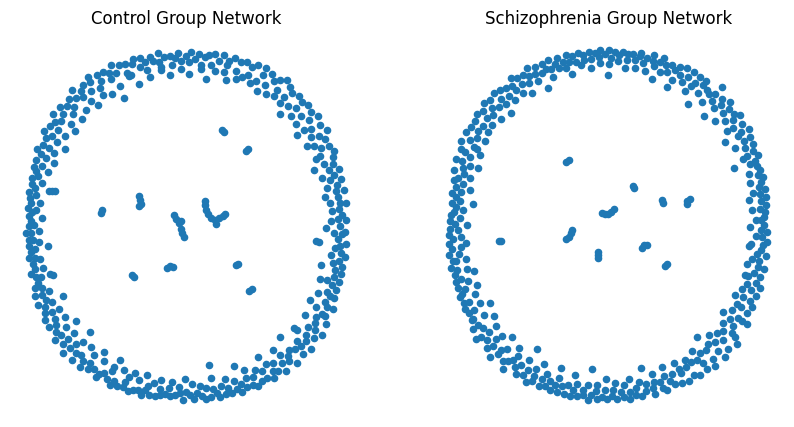

Degree Centrality (Control): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.002257336343115124, 11: 0.002257336343115124, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.002257336343115124, 16: 0.002257336343115124, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.004514672686230248, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.002257336343115124, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.002257336343115124, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.0, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.0, 71: 0.0, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.002257336343115124, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.0, 89: 0.0, 90: 0.0, 91: 0.0, 92: 0.0, 93: 0.0

In [181]:

# Visualization
plt.figure(figsize=(10, 5))
plt.subplot(121)
nx.draw(G_cont, node_size=20, edge_color="blue")
plt.title("Control Group Network")
plt.subplot(122)
nx.draw(G_scz, node_size=20, edge_color="red")
plt.title("Schizophrenia Group Network")
plt.show()

# Output some metrics
print("Degree Centrality (Control):", deg_cent_cont)
print("Degree Centrality (SCZ):", deg_cent_scz)

In [182]:
# Assuming G_cont and G_scz are your graph objects for control and schizophrenia groups respectively
eigenvector_cont = nx.eigenvector_centrality_numpy(G_cont, max_iter=1000, weight='weight')
eigenvector_scz = nx.eigenvector_centrality_numpy(G_scz, max_iter=1000, weight='weight')

In [183]:
# eigs = nx.eigenvector_centrality_numpy(G_cont, weight='weight')
# eigs

In [184]:
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# nx.draw(G_cont, node_size=[800 * np.abs(v) for v in eigenvector_cont.values()], with_labels=False)
# plt.title('Eigenvector Centrality (Control)')

# plt.subplot(1, 2, 2)
# nx.draw(G_scz, node_size=[800 * np.abs(v) for v in eigenvector_scz.values()], with_labels=False)
# plt.title('Eigenvector Centrality (Schizophrenia)')

# plt.show()

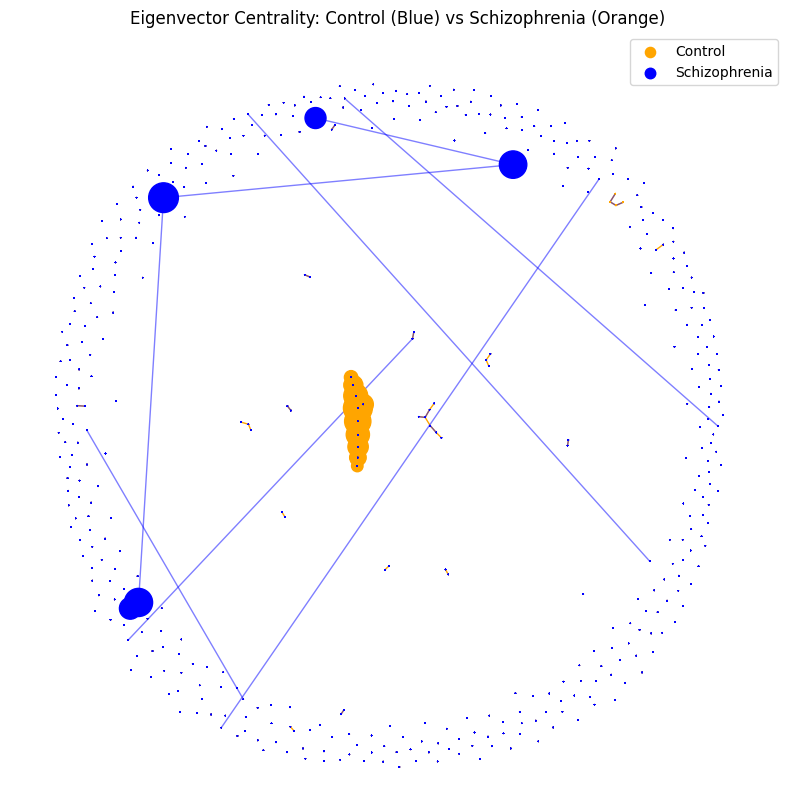

In [212]:
# Define node positions based on the control group for consistent layout across both networks
pos = nx.spring_layout(G_cont)  # or nx.kamada_kawai_layout

# Prepare the plot
plt.figure(figsize=(10, 10))
plt.title("Eigenvector Centrality: Control (Blue) vs Schizophrenia (Orange)")

# Draw Control Network
nx.draw_networkx_nodes(G_cont, pos, node_color='orange', node_size=[800 * np.abs(v) for v in eigenvector_cont.values()], label='Control')
nx.draw_networkx_edges(G_cont, pos, edge_color='orange', alpha=1)

# Draw Schizophrenia Network
nx.draw_networkx_nodes(G_scz, pos, node_color='blue', node_size=[800 * np.abs(v) for v in eigenvector_scz.values()], label='Schizophrenia')
nx.draw_networkx_edges(G_scz, pos, edge_color='blue', alpha=0.5)

# Show legend with small markers
plt.legend(markerscale=0.5)

# Hide axes
plt.axis('off')
plt.savefig('network_comparison.png')

# Show the plot
plt.show()

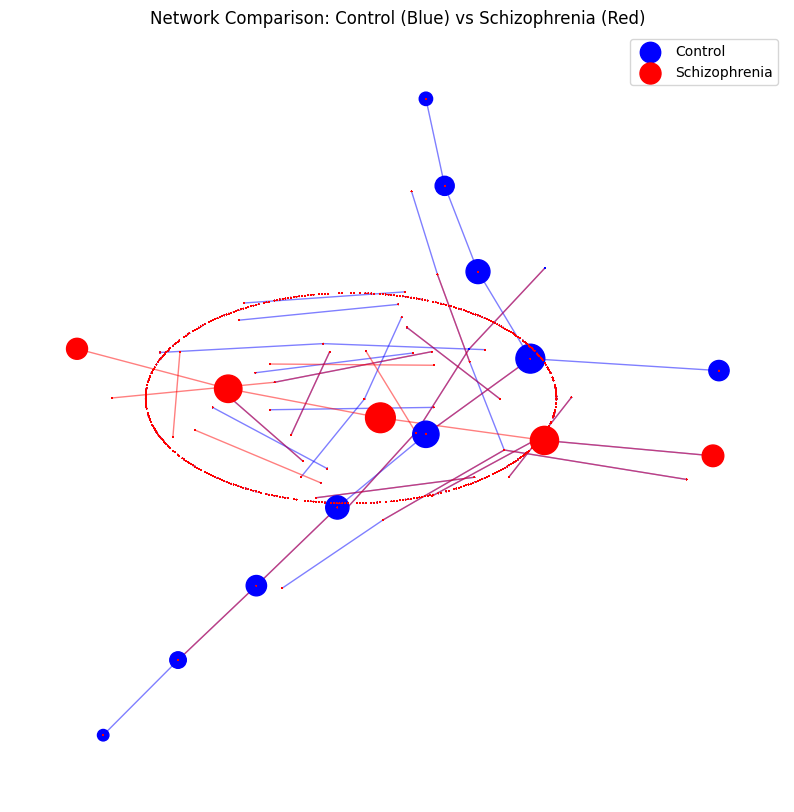

In [186]:
# Define node positions using the Kamada-Kawai layout based on the combined graph for consistency
combined_graph = nx.compose(G_cont, G_scz)  # Combine graphs to get a consistent layout
pos = nx.kamada_kawai_layout(combined_graph)  # Generates positions from combined graph

# Prepare the plot
plt.figure(figsize=(10, 10))
plt.title('Network Comparison: Control (Blue) vs Schizophrenia (Red)')

# Draw Control Network
nx.draw_networkx_nodes(G_cont, pos, node_color='blue', node_size=[800 * np.abs(v) for v in eigenvector_cont.values()], label='Control')
nx.draw_networkx_edges(G_cont, pos, edge_color='blue', alpha=0.5)

# Draw Schizophrenia Network
nx.draw_networkx_nodes(G_scz, pos, node_color='red', node_size=[800 * np.abs(v) for v in eigenvector_scz.values()], label='Schizophrenia')
nx.draw_networkx_edges(G_scz, pos, edge_color='red', alpha=0.5)

# Show legend
plt.legend()

# Hide axes
plt.axis('off')

# Show the plot
plt.show()

In [190]:
# Assuming G_cont and G_scz are your graph objects for control and schizophrenia groups respectively
def compute_metrics(graph):
    metrics = {
        'degree': dict(nx.degree_centrality(graph)),
        'eigenvector': dict(nx.eigenvector_centrality(graph, max_iter=1000, weight='weight')),
        'betweenness': dict(nx.betweenness_centrality(graph, weight='weight'))
    }
    return metrics

metrics_cont = compute_metrics(G_cont)
metrics_scz = compute_metrics(G_scz)

In [196]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Helper function to extract metric values
def extract_values(metrics):
    return {key: list(val.values()) for key, val in metrics.items()}

values_cont = extract_values(metrics_cont)
values_scz = extract_values(metrics_scz)

# Perform Mann-Whitney U test for each metric
p_values_left = []
test_results_left = {}

for metric in values_cont:
    stat, p = mannwhitneyu(values_cont[metric], values_scz[metric], alternative='two-sided')
    test_results_left[metric] = (stat, p)
    p_values_left.append(p)

# Apply FDR correction
rejected_left, p_values_corrected_left, _, _ = multipletests(p_values_left, alpha=0.05, method='fdr_by')

# Display results
for i, metric in enumerate(values_cont):
    print(f"{metric.capitalize()} - U Statistic: {test_results_left[metric][0]}, "
          f"P-Value: {test_results_left[metric][1]}, "
          f"Corrected P-Value: {p_values_corrected_left[i]}, "
          f"Reject Null: {rejected_left[i]}")

Degree - U Statistic: 101121.0, P-Value: 0.2127170375237566, Corrected P-Value: 0.38998123546022034, Reject Null: False
Eigenvector - U Statistic: 21939.0, P-Value: 2.1136008260865163e-108, Corrected P-Value: 1.1624804543475838e-107, Reject Null: True
Betweenness - U Statistic: 100161.0, P-Value: 0.12990067617337872, Corrected P-Value: 0.35722685947679145, Reject Null: False


In [214]:
# Perform Mann-Whitney U test for each metric
p_values_left = []
test_results_left = {}

for metric in values_cont:
    stat, p = mannwhitneyu(values_cont[metric], values_scz[metric], alternative='less')
    test_results_left[metric] = (stat, p)
    p_values_left.append(p)

# Apply FDR correction
rejected_left, p_values_corrected_left, _, _ = multipletests(p_values_left, alpha=0.05, method='fdr_by')

# Display results
for i, metric in enumerate(values_cont):
    print(f"{metric.capitalize()} - U Statistic: {test_results_left[metric][0]}, "
          f"P-Value: {test_results_left[metric][1]}, "
          f"Corrected P-Value: {p_values_corrected_left[i]}, "
          f"Reject Null: {rejected_left[i]}")

Degree - U Statistic: 101121.0, P-Value: 0.8937310550027895, Corrected P-Value: 1.0, Reject Null: False
Eigenvector - U Statistic: 21939.0, P-Value: 1.0568004130432581e-108, Corrected P-Value: 5.812402271737919e-108, Reject Null: True
Betweenness - U Statistic: 100161.0, P-Value: 0.9351700869004952, Corrected P-Value: 1.0, Reject Null: False
